In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import metrics 
from sklearn.metrics import silhouette_score

from sklearn.model_selection import ParameterGrid

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

In [2]:
data = pd.read_csv('driver_details.csv')
data.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
data.shape

(4000, 3)

In [4]:
data[data.isnull().any(axis=1)]

,Driver_ID,Distance_Feature,Speeding_Feature


In [5]:
data.describe()

,Driver_ID,Distance_Feature,Speeding_Feature
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
drivers_features = data.drop('Driver_ID', axis = 1)

In [7]:
drivers_features.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [8]:
parameters = {'n_clusters' : [2, 3, 4, 5, 10, 20, 30]}

parameter_grid = ParameterGrid(parameters)

In [9]:
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [10]:
best_score = -1
model = KMeans()

In [11]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(drivers_features)
    
    ss = metrics.silhouette_score(drivers_features, model.labels_)
    print('Parameters : ', g, 'Score', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameters :  {'n_clusters': 2} Score 0.8490223286225532
Parameters :  {'n_clusters': 3} Score 0.8231396834167266
Parameters :  {'n_clusters': 4} Score 0.5911323766293183
Parameters :  {'n_clusters': 5} Score 0.5124962013125903
Parameters :  {'n_clusters': 10} Score 0.41973733928813906
Parameters :  {'n_clusters': 20} Score 0.3640930163474968
Parameters :  {'n_clusters': 30} Score 0.34435415729672636


In [12]:
best_grid

{'n_clusters': 2}

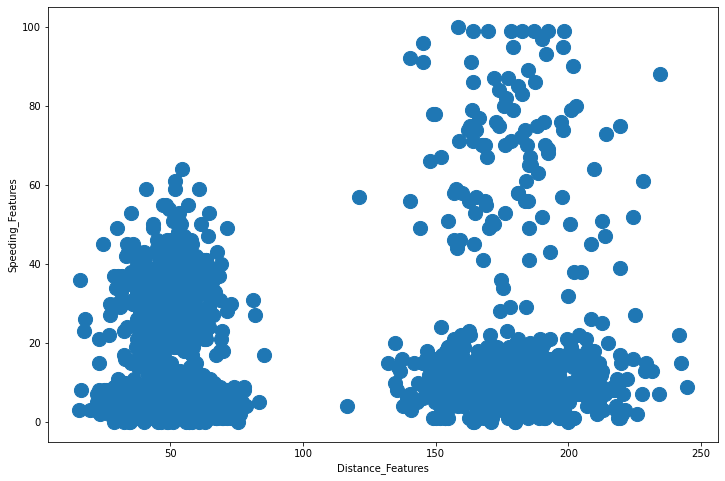

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(drivers_features['Distance_Feature'],
           drivers_features['Speeding_Feature'], s = 200)

plt.xlabel('Distance_Features')
plt.ylabel('Speeding_Features')

plt.show()

In [19]:
#DBSCAN takes 2 parameters eps -  minimum distances for points to be considered neighbors
#min_samples - minimum no of points required to form a dense region


parameters = {'eps': [0.9, 1.0, 5.0, 10.0, 12.0, 14.0, 20.0],
              'min_samples': [5, 7, 10, 12]}

parameter_grid = ParameterGrid(parameters)

list(parameter_grid)

[{'eps': 0.9, 'min_samples': 5},
 {'eps': 0.9, 'min_samples': 7},
 {'eps': 0.9, 'min_samples': 10},
 {'eps': 0.9, 'min_samples': 12},
 {'eps': 1.0, 'min_samples': 5},
 {'eps': 1.0, 'min_samples': 7},
 {'eps': 1.0, 'min_samples': 10},
 {'eps': 1.0, 'min_samples': 12},
 {'eps': 5.0, 'min_samples': 5},
 {'eps': 5.0, 'min_samples': 7},
 {'eps': 5.0, 'min_samples': 10},
 {'eps': 5.0, 'min_samples': 12},
 {'eps': 10.0, 'min_samples': 5},
 {'eps': 10.0, 'min_samples': 7},
 {'eps': 10.0, 'min_samples': 10},
 {'eps': 10.0, 'min_samples': 12},
 {'eps': 12.0, 'min_samples': 5},
 {'eps': 12.0, 'min_samples': 7},
 {'eps': 12.0, 'min_samples': 10},
 {'eps': 12.0, 'min_samples': 12},
 {'eps': 14.0, 'min_samples': 5},
 {'eps': 14.0, 'min_samples': 7},
 {'eps': 14.0, 'min_samples': 10},
 {'eps': 14.0, 'min_samples': 12},
 {'eps': 20.0, 'min_samples': 5},
 {'eps': 20.0, 'min_samples': 7},
 {'eps': 20.0, 'min_samples': 10},
 {'eps': 20.0, 'min_samples': 12}]

In [22]:
model = DBSCAN()
best_score = -1

In [23]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(drivers_features)

    ss = metrics.silhouette_score(drivers_features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'eps': 0.9, 'min_samples': 5} Score:  -0.6057173612292268
Parameter:  {'eps': 0.9, 'min_samples': 7} Score:  -0.4265046999507063
Parameter:  {'eps': 0.9, 'min_samples': 10} Score:  -0.39254168253371013
Parameter:  {'eps': 0.9, 'min_samples': 12} Score:  -0.4286838741223884
Parameter:  {'eps': 1.0, 'min_samples': 5} Score:  -0.6155746493060738
Parameter:  {'eps': 1.0, 'min_samples': 7} Score:  -0.41637001640330673
Parameter:  {'eps': 1.0, 'min_samples': 10} Score:  -0.3837814631696031
Parameter:  {'eps': 1.0, 'min_samples': 12} Score:  -0.38648235283744914
Parameter:  {'eps': 5.0, 'min_samples': 5} Score:  0.31011275260225
Parameter:  {'eps': 5.0, 'min_samples': 7} Score:  0.7820011223700856
Parameter:  {'eps': 5.0, 'min_samples': 10} Score:  0.7974222681120255
Parameter:  {'eps': 5.0, 'min_samples': 12} Score:  0.7914367881923341
Parameter:  {'eps': 10.0, 'min_samples': 5} Score:  0.7598056658175874
Parameter:  {'eps': 10.0, 'min_samples': 7} Score:  0.8157570071704705
Par

In [25]:
best_grid

{'eps': 20.0, 'min_samples': 5}

In [28]:
model.set_params(**best_grid)
model.fit(drivers_features)

DBSCAN(eps=20.0)

In [29]:
len(model.labels_)

4000

In [30]:
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)

n_clusters

2

In [31]:
n_noise = list(model.labels_).count(-1)
n_noise

0

In [32]:
another_grid = {'eps': 5.0, 'min_samples': 5}

model.set_params(**another_grid)
model.fit(drivers_features)

n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('Number of clusters: ', n_clusters)

n_noise = list(model.labels_).count(-1)
print('Noisy points: ', n_noise)

Number of clusters:  7
Noisy points:  117


In [33]:
another_grid = {'eps': 5.0, 'min_samples': 7}

model.set_params(**another_grid)
model.fit(drivers_features)

n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('Number of clusters: ', n_clusters)

n_noise = list(model.labels_).count(-1)
print('Noisy points: ', n_noise)

Number of clusters:  3
Noisy points:  157


In [34]:
from sklearn.cluster import estimate_bandwidth
estimate_bandwidth(drivers_features) #Computationally intensive operation
#Time taken to calculate the best bandwidth is quadratic in the number  of samples

33.960524729584314

In [35]:
model = MeanShift(bandwidth = estimate_bandwidth(drivers_features)).fit(drivers_features)

metrics.silhouette_score(drivers_features, model.labels_)

0.8231396834167266